## Basketball Analysis

The goal of this notebook is to introduce my analysis pipeline for evaluating NBA player propositions. Player propositions are simple questions, such as 'will Kevin Durant make over or under 2.5 three-pointers in tonight's game?' I've established several classes that make evaluating these propositions easy and intutive.

First, let's load in useful libraries:

In [1]:
import pandas as pd
import numpy as np
from scraping_tools import *
import matplotlib.pyplot as plt

### Introduction: A Tutorial in the Player class

Since I'm interested only in individual player performance, it makes sense to have one object that contains all the information we need on a player. Simply think of a player you want to look at and call `Player(name)` to retrieve their game log for the current season.

Here is an example of a player I want to look at. I then select his previous 5 games and look at the game log:

In [2]:
jaylen = Player('Jaylen Brown')
jaylen.last_5()
jaylen.display_log()

,G,Date,Age,Tm,,Opp,,GS,Min,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
63,46,2022-02-16,25-115,BOS,,DET,L (-1),1,37.950000,12,21,0.571,3,6,0.500,4,5,0.800,0,2,2,6,1,0,2,3,31,23.3,-4
65,47,2022-02-24,25-123,BOS,@,BRK,W (+23),1,29.733333,6,12,0.500,1,5,0.200,5,8,0.625,0,1,1,6,1,1,1,3,18,14.8,16
66,48,2022-02-26,25-125,BOS,@,DET,W (+9),1,35.783333,10,24,0.417,1,6,0.167,6,6,1.000,1,2,3,0,0,0,3,4,27,10.9,11
67,49,2022-02-27,25-126,BOS,@,IND,L (-21),1,35.216667,10,16,0.625,2,5,0.400,1,4,0.250,0,4,4,8,1,0,2,2,23,19.6,-13
68,50,2022-03-01,25-128,BOS,,ATL,W (+9),1,2.800000,1,1,1.000,0,0,NaN,0,0,NaN,0,1,1,1,0,0,2,1,2,0.3,4


We can apply additional filters, such as looking at only home games:

In [3]:
jaylen.home_games()
jaylen.display_log()

,G,Date,Age,Tm,,Opp,,GS,Min,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
63,46,2022-02-16,25-115,BOS,,DET,L (-1),1,37.95,12,21,0.571,3,6,0.5,4,5,0.8,0,2,2,6,1,0,2,3,31,23.3,-4
68,50,2022-03-01,25-128,BOS,,ATL,W (+9),1,2.80,1,1,1.000,0,0,NaN,0,0,NaN,0,1,1,1,0,0,2,1,2,0.3,4


And we can remove the filters at any time:

In [4]:
jaylen.reset_filters()
jaylen.display_log()

,G,Date,Age,Tm,,Opp,,GS,Min,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
2,1,2021-10-20,24-361,BOS,@,NYK,L (-4),1,45.966667,16,30,0.533,8,14,0.571,6,8,0.750,0,9,9,6,3,1,4,5,46,35.2,16
3,2,2021-10-22,24-363,BOS,,TOR,L (-32),1,28.400000,3,13,0.231,0,7,0.000,3,4,0.750,0,4,4,0,0,0,5,2,9,-3.9,3
5,3,2021-10-25,25-001,BOS,@,CHO,W (+11),1,37.983333,12,20,0.600,3,7,0.429,3,4,0.750,3,6,9,3,3,1,3,3,30,25.9,12
6,4,2021-10-27,25-003,BOS,,WAS,L (-9),1,37.350000,5,16,0.313,1,4,0.250,2,2,1.000,0,4,4,1,0,0,3,3,13,1.5,-8
7,5,2021-10-30,25-006,BOS,@,WAS,L (-3),1,47.383333,14,24,0.583,0,5,0.000,6,7,0.857,0,6,6,2,1,1,3,3,34,23.1,-6
8,6,2021-11-01,25-008,BOS,,CHI,L (-14),1,33.583333,10,18,0.556,5,8,0.625,3,4,0.750,0,7,7,3,1,0,1,3,28,22.0,1
9,7,2021-11-03,25-010,BOS,@,ORL,W (+13),1,31.800000,10,17,0.588,3,8,0.375,5,7,0.714,0,5,5,3,1,0,2,4,28,20.3,16
10,8,2021-11-04,25-011,BOS,@,MIA,W (+17),1,29.283333,5,14,0.357,3,5,0.600,4,5,0.800,0,5,5,2,1,1,2,2,17,10.6,12
19,9,2021-11-22,25-029,BOS,,HOU,W (+18),1,22.783333,6,13,0.462,3,6,0.500,4,4,1.000,0,3,3,0,1,1,2,4,19,11.3,21
20,10,2021-11-24,25-031,BOS,,BRK,L (-19),1,23.950000,5,15,0.333,0,8,0.000,3,3,1.000,1,4,5,0,2,0,2,2,13,5.6,-7


By default, the current season is selected and games where the player did not play are removed. To change these, set `season` to the year you wish to look at or `clean` to `False` to look at all games. Note that removing games where the player was inactive allows us to clean our data better, and functionality is lost if these games are kept in.

In [5]:
jaylen_2020_raw = Player('Jaylen Brown', season=2020, clean=False)
jaylen_2020_raw.last_5()
jaylen_2020_raw.display_log()

,G,Date,Age,Tm,,Opp,,GS,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
68,54,2020-08-05,23-286,BOS,,BRK,W (+34),1,23:57,7,13,.538,5,9,.556,2,3,.667,0,4,4,2,1,1,2,2,21,15.8,+5
69,55,2020-08-07,23-288,BOS,@,TOR,W (+22),1,31:42,7,14,.500,4,8,.500,2,2,1.000,2,4,6,2,0,0,1,2,20,15.2,+28
70,56,2020-08-09,23-290,BOS,,ORL,W (+3),1,38:45,7,19,.368,3,9,.333,2,3,.667,1,11,12,1,2,1,1,1,19,14.1,-2
71,57,2020-08-11,23-292,BOS,@,MEM,W (+15),1,28:14,3,13,.231,1,8,.125,0,2,.000,0,4,4,2,1,1,1,4,7,0.0,+16
72,,2020-08-13,23-294,BOS,,WAS,L (-6),Inactive,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


Not every player is yet available for analysis. If you try to get a player log for an unavailable player, you'll get an error.

In [6]:
test = Player('Wayne Ellington')

Wayne Ellington is not yet available for analysis.


### Proposition Logs

The `PropositionLog` is another class that houses propositions for analysis. You can initialize it with values, or you can initialize a blank log as we do here.

In [7]:
props = PropositionLog()
props.display_props()

,Player Name,Statistic,Line


Now we can start adding propositions. Pass in three arguments:
1. A `Player` object to analyze.
2. A statistic to look at.
3. The line for that player to hit.

In [8]:
props.add_prop(jaylen, 'Assists', 3.5)
props.display_props()

,Player Name,Statistic,Line
0,Jaylen Brown,Assists,3.5


We can add in a couple more. Let's look at Kevin Durant (2.5 3-Pt Made) and CJ McCollum (21.5 Points) as well. We will judge Kevin Durant on home games (since his teammate Kyrie Irving is not allowed to play home games), and CJ McCollum since he was traded to the Pelicans.

In [9]:
durant = Player('Kevin Durant')
durant.home_games()
cj = Player('CJ McCollum')
cj.filter_by_team('NOP')

props.add_prop(durant, '3-PT Made', 2.5)
props.add_prop(cj, 'Points', 21.5)
props.display_props()

,Player Name,Statistic,Line
0,Jaylen Brown,Assists,3.5
1,Kevin Durant,3-PT Made,2.5
2,CJ McCollum,Points,21.5


Now, we can calculate the proportion of games we selected where the player hit the mark we specified. It will display whether the over or under is more likely. To do this, call `evaluate()`.

In [10]:
props.evaluate()
props.display_props()

,Player Name,Statistic,Line,Over/Under,Percentage
0,Jaylen Brown,Assists,3.5,Under,0.66
1,Kevin Durant,3-PT Made,2.5,Under,0.90
2,CJ McCollum,Points,21.5,Over,0.75


We can also look at the distribution of a player's performance overlayed by the prop. Specify the prop you wish to look at by the index of the prop above:

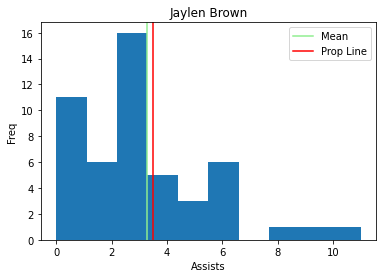

In [11]:
props.histogram(0)